In [1]:
print('hello Basit')

hello Basit


In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Setting visual styles
sns.set(style="whitegrid")

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [23]:
# Load the dataset
# Replace 'ecommerce_data.csv' with your dataset file path
df= pd.read_csv('data.csv', encoding='latin1')

# Display the first 5 rows of the dataset
print(df.head())

# Check for null values
print("\nMissing values:\n", df.isnull().sum())

# Check basic statistics
print("\nDataset statistics:\n", df.describe())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Datas

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Series([], Name: item_id, dtype: float64)

In [25]:
# Drop duplicates
df = df.drop_duplicates()

# Fill or drop missing values
df = df.dropna()

print("Data cleaned. Shape of the dataset:", df.shape)


Data cleaned. Shape of the dataset: (401604, 8)


In [27]:
# Assuming the dataset has 'CustomerID', 'InvoiceDate', and 'TotalPrice'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Recency: Days since last purchase
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df['Recency'] = (snapshot_date - df['InvoiceDate']).dt.days

# Frequency: Total number of purchases
frequency = df.groupby('CustomerID').size()

# Monetary: Total spending
monetary = df.groupby('CustomerID')['CustomerID'].sum()

# Combine RFM metrics
rfm = pd.DataFrame({'Recency': df.groupby('CustomerID')['Recency'].min(),
                    'Frequency': frequency,
                    'Monetary': monetary})

print(rfm.head())


            Recency  Frequency   Monetary
CustomerID                               
12346.0         326          2    24692.0
12347.0           2        182  2247154.0
12348.0          75         31   382788.0
12349.0          19         73   901477.0
12350.0         310         17   209950.0


In [28]:
# Scaling RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

print("Data scaled successfully!")


Data scaled successfully!


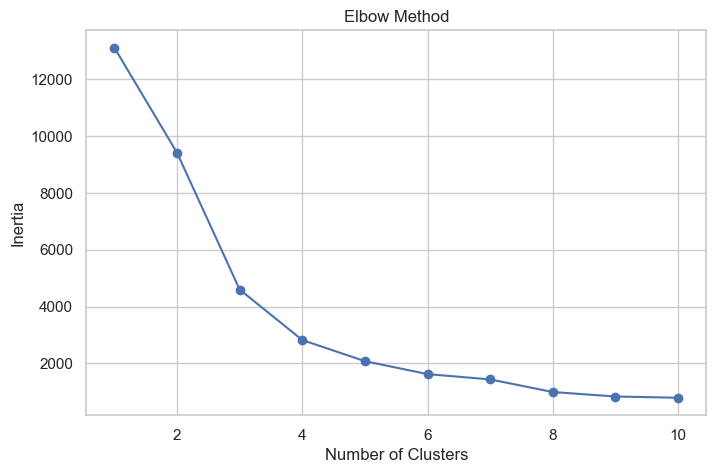

In [29]:
# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [30]:
# Fit K-Means with the optimal number of clusters (e.g., k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print("Clusters created successfully!")
print(rfm.head())


Clusters created successfully!
            Recency  Frequency   Monetary  Cluster
CustomerID                                        
12346.0         326          2    24692.0        1
12347.0           2        182  2247154.0        0
12348.0          75         31   382788.0        0
12349.0          19         73   901477.0        0
12350.0         310         17   209950.0        1


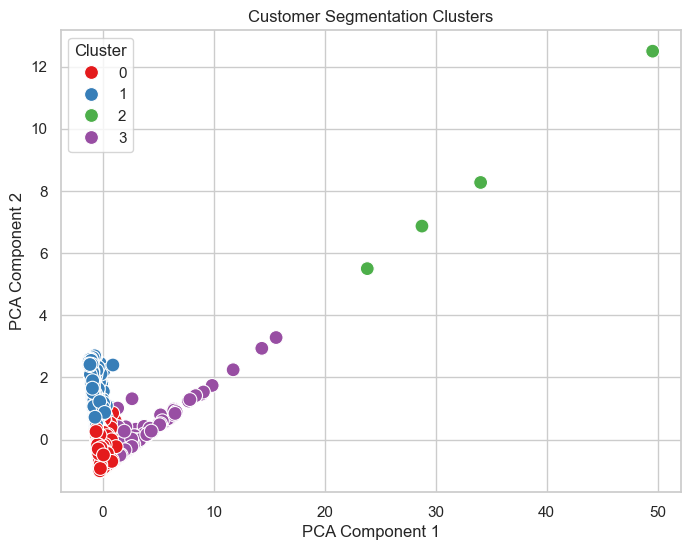

In [31]:
# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=rfm['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [32]:
rfm.to_csv('customer_segments.csv', index=False)
print("Customer segmentation saved successfully!")


Customer segmentation saved successfully!
